In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
from sklearn.preprocessing import KBinsDiscretizer

# Load the dataset from a CSV file
file_path = '/content/drive/MyDrive/intern dataset/data.csv'
df = pd.read_csv(file_path)

# Filter the dataset to remove outliers by price
# Only keep rows where the price is between 10,000 and 5,000,000
df = df[(df['price'] > 10000) & (df['price'] < 5000000)]

# Apply a log transformation to the 'price' column to normalize the data
df['price'] = np.log1p(df['price'])

# Define the features to be used in the model
features = ['sqft_living', 'bedrooms', 'bathrooms', 'floors', 'sqft_lot']
X = df[features]  # Feature matrix
y = df['price']   # Target variable


In [5]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [6]:
# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set
lr_predictions = lr_model.predict(X_test)

# Convert the log-transformed predictions and test values back to the original scale
y_test_original = np.expm1(y_test)
lr_predictions_original = np.expm1(lr_predictions)


In [7]:
# Calculate Mean Squared Error (MSE) for the Linear Regression model
lr_mse = mean_squared_error(y_test, lr_predictions)

# Calculate R-squared (R2) score for the Linear Regression model
lr_r2 = r2_score(y_test, lr_predictions)

# Print the evaluation metrics
print(f"Linear Regression MSE: {lr_mse:.4f}, R2: {lr_r2:.4f}")


Linear Regression MSE: 0.1596, R2: 0.4469


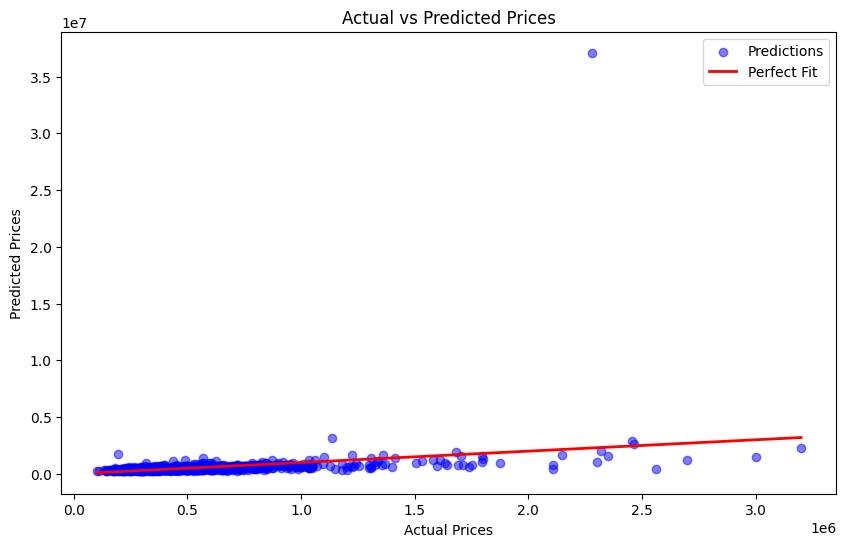

In [8]:
# Create a scatter plot to compare actual vs predicted prices
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted prices
plt.scatter(y_test_original, lr_predictions_original, color='blue', alpha=0.5, label='Predictions')

# Add a line representing perfect predictions (y = x)
plt.plot([y_test_original.min(), y_test_original.max()],
         [y_test_original.min(), y_test_original.max()],
         color='red', lw=2, label='Perfect Fit')

# Label the x-axis and y-axis
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

# Add a title to the plot
plt.title('Actual vs Predicted Prices')

# Display the legend
plt.legend()

# Show the plot
plt.show()


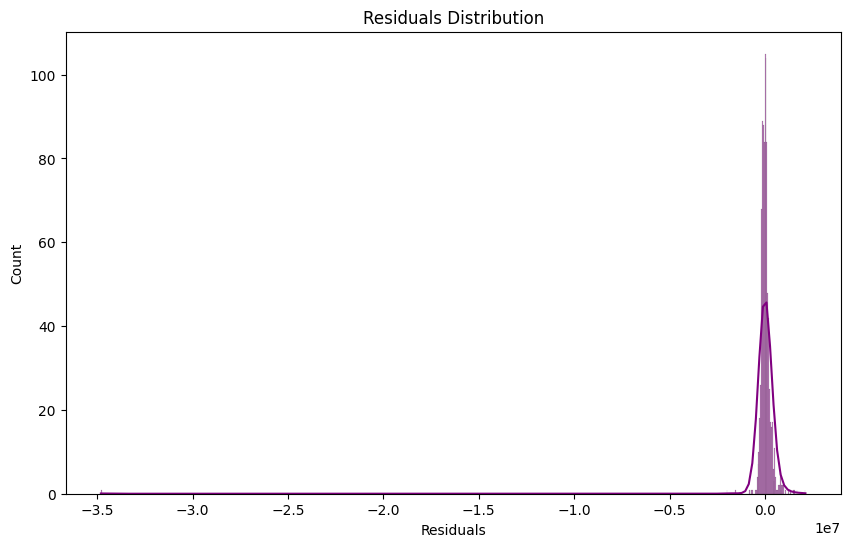

In [9]:
# Calculate residuals as the difference between actual and predicted prices
residuals = y_test_original - lr_predictions_original

# Create a histogram to visualize the distribution of residuals
plt.figure(figsize=(10, 6))

# Plot the histogram with a Kernel Density Estimate (KDE) overlay
sns.histplot(residuals, kde=True, color='purple')

# Label the x-axis
plt.xlabel('Residuals')

# Add a title to the plot
plt.title('Residuals Distribution')

# Show the plot
plt.show()


In [10]:
# Create a DataFrame to compare actual vs. predicted prices
comparison_df = pd.DataFrame({
    'Actual': y_test_original,     # Column for actual prices
    'Predicted': lr_predictions_original  # Column for predicted prices
})

# Display the first few rows of the comparison DataFrame
print(comparison_df.head())


         Actual     Predicted
471   1225000.0  1.641822e+06
2518   496752.0  4.420504e+05
23     612500.0  6.051408e+05
3919   650000.0  3.412698e+05
135    615000.0  4.644166e+05
